*Kunskapskontroll 2*

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
print(mnist.DESCR)
X = mnist.data
y = mnist.target.astype(int)
print("MNIST data loaded.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=10000,
    random_state=42,
    stratify=y
)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=10000,
    random_state=42,
    stratify=y_train_full
)

print("\nData splits:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Data splits:
Training set: (50000, 784) (50000,)
Validation set: (10000, 784) (10000,)
Test set: (10000, 784) (10000,)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("\nData has been scaled with StandardScaler.")


Data has been scaled with StandardScaler.


In [8]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
svm_clf = SVC(random_state=42)  # RBF kernel by default
linear_svc = LinearSVC(random_state=42, max_iter=1000, dual=False, C=0.1)

models = {
    "Random Forest": rf_clf,
    "Extra Trees": et_clf,
    "SVM (RBF)": svm_clf,
    "Linear SVC": linear_svc
}

In [ ]:
print("\n============================")
print("K-Fold Cross Validation Results:")
print("============================")
k = 5  

for name, model in models.items():
    # small pipeline so that scaling is done within each fold
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='accuracy', n_jobs=-1)
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")



K-Fold Cross Validation Results:
Random Forest: Mean CV Accuracy = 0.9658 (+/- 0.0019)
Extra Trees: Mean CV Accuracy = 0.9684 (+/- 0.0014)
SVM (RBF): Mean CV Accuracy = 0.9603 (+/- 0.0031)
Linear SVC: Mean CV Accuracy = 0.9082 (+/- 0.0027)


In [10]:
print("\n============================")
print("Validation Set Evaluation:")
print("============================")
val_accuracies = {}
for name, model in models.items():
    # Train on the scaled training set
    model.fit(X_train_scaled, y_train)
    # Predict on the scaled validation set
    y_val_pred = model.predict(X_val_scaled)
    # Compute accuracy
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies[name] = acc
    print(f"{name} validation accuracy: {acc:.4f}")


Validation Set Evaluation:
Random Forest validation accuracy: 0.9709
Extra Trees validation accuracy: 0.9731
SVM (RBF) validation accuracy: 0.9656
Linear SVC validation accuracy: 0.9142


c:\Users\anaba\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
best_model_name = max(val_accuracies, key=val_accuracies.get)
best_model = models[best_model_name]
print(f"\nBest model on validation set: {best_model_name}")


Best model on validation set: Extra Trees


In [12]:
y_test_pred = best_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test accuracy ({best_model_name}): {test_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)


Final Test accuracy (Extra Trees): 0.9706

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.98      0.99      0.98      1125
           2       0.97      0.97      0.97       999
           3       0.96      0.96      0.96      1020
           4       0.98      0.97      0.97       975
           5       0.98      0.97      0.97       902
           6       0.98      0.99      0.98       982
           7       0.98      0.97      0.97      1042
           8       0.96      0.96      0.96       975
           9       0.94      0.95      0.95       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[ 977    1    1    0    1    0    3    0    3    0]
 [   0 1110    5    3    1    1    2    2    1    0]
 [   6    1  968    4    3    0    2    8    6  

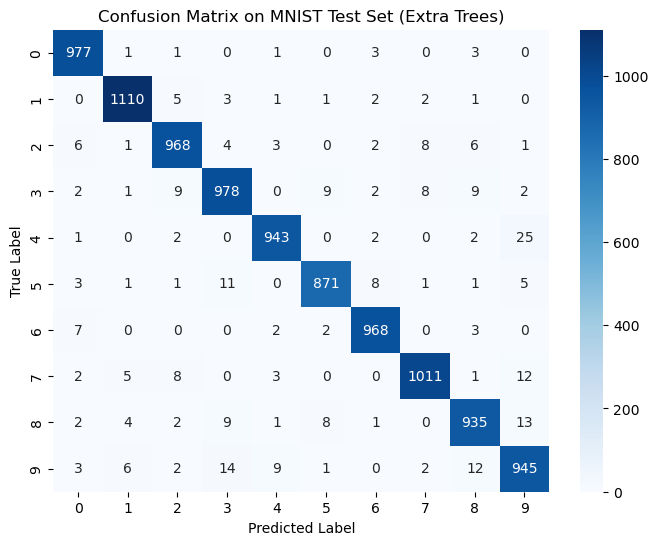

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix on MNIST Test Set ({best_model_name})')
plt.show()


Voting Classifier validation accuracy: 0.9709
Voting Classifier test accuracy: 0.9680


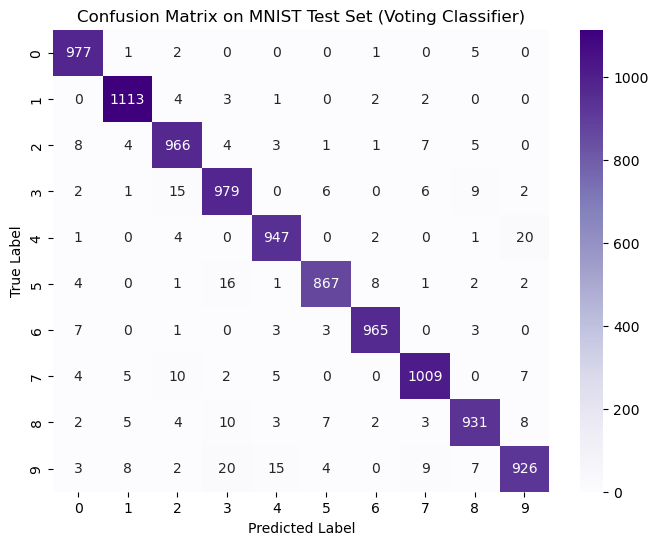

In [14]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('et', et_clf),
        ('svm', svm_clf),
        ('linear_svc', linear_svc)
    ],
    voting='hard',
    n_jobs=-1
)

voting_clf.fit(X_train_scaled, y_train)
y_val_pred_voting = voting_clf.predict(X_val_scaled)
voting_val_acc = accuracy_score(y_val, y_val_pred_voting)
print(f"\nVoting Classifier validation accuracy: {voting_val_acc:.4f}")

y_test_pred_voting = voting_clf.predict(X_test_scaled)
voting_test_acc = accuracy_score(y_test, y_test_pred_voting)
print(f"Voting Classifier test accuracy: {voting_test_acc:.4f}")

cm_voting = confusion_matrix(y_test, y_test_pred_voting)
plt.figure(figsize=(8,6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on MNIST Test Set (Voting Classifier)')
plt.show()